In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tabla_mortalidad = pd.read_csv("mortalidad.csv")
tabla_mortalidad.index = range(15,100)

class Persona:
    def __init__(self, edad):
        vivos = list(tabla_mortalidad.lx)
        muertos = list(tabla_mortalidad.dx)
        proba_morir = list(tabla_mortalidad.px)
        proba_vivir = list(tabla_mortalidad.qx)
        Dx = list(tabla_mortalidad.Dx)
        Nx = list(tabla_mortalidad.Nx)
        Cx = list(tabla_mortalidad.Cx)
        Mx = list(tabla_mortalidad.Mx)
        self.lx = vivos[edad-15]
        self.dx = muertos[edad-15]
        self.px = proba_morir[edad-15]
        self.qx = proba_vivir[edad-15]
        self.Dx = Dx[edad-15]
        self.Nx = Nx[edad-15]
        self.Cx = Cx[edad-15]
        self.Mx = Mx[edad-15]
        self.edad = edad
        if edad < 15:
            error = f"Edad fuera de los parámetros."
            raise IndexError(error)
        elif edad > 99:
            error2 = f"Edad fuera de los parámetros."
            raise IndexError(error2)
        else:
            print(f"Bienvenido.")
            
    def datos_tabla(self, nuev_dato):
        nuev_dato = nuev_dato.lower()
        if nuev_dato == "lx":
            return self.lx
        elif nuev_dato == "dx":
            return self.dx
        elif nuev_dato == "px":
            return self.px
        elif nuev_dato == "qx":
            return self.qx
        else:
            raise KeyError("Ingrese un dato válido.")
            
    def cálculo_de_primas(self, tipo_seguro, tiempo, suma_asegurada):
        seguro = tipo_seguro.lower()
        tiempo1 = tiempo + self.edad
        if seguro == "ordinario":
            ordi = float(self.Mx.replace("$","").replace(",",""))
            nario = float(self.Dx.replace("$","").replace(",",""))
            sord = (ordi/nario)*suma_asegurada
            return f"La prima será de: ${sord}"
        
        elif seguro == "temporal":
            tem = float(self.Mx.replace("$","").replace(",",""))
            x = list(tabla_mortalidad.Mx)[tiempo1-15]
            po = float(y.replace("$","").replace(",",""))
            ral = float(self.Dx.replace("$","").replace(",",""))
            stemporal = ((tem-po)/ral)*suma_asegurada
            return f"La prima será de: ${stemporal}"
        
        elif seguro == "dotal":
                dotalMx = float(self.Mx.replace("$","").replace(",",""))
                x = list(tabla_mortalidad.Mx)[tiempo1-15]
                x2 = list(tabla_mortalidad.Dx)[tiempo1-15]
                dotalMxx = float(x.replace("$","").replace(",",""))
                dotalDxn = float(x2.replace("$","").replace(",",""))
                dotalDx = float(self.Dx.replace("$","").replace(",",""))
                dotal = ((dotalMx - dotalMxx + dotalDxn)/(dotalDx))*suma_asegurada
                return f"La prima será de: ${dotal}"
    
    def gráficas(self, dato, px = False):
        dato = dato.lower()
        if dato == "lx":
            x = tabla_mortalidad.lx.apply(lambda v: v.replace("$", "").replace(",", "")).astype(float)
            plt.grid(alpha = 6)
            plt.xlabel("Edad")
            plt.ylabel("Muestra")
            plt.title("lx")
            plt.plot(x, color="red")
            plt.legend()
            plt.show() 
        elif dato == "dx":
            x = tabla_mortalidad.dx.apply(lambda v: v.replace("$", "").replace(",", "")).astype(float)
            plt.grid(alpha = 6)
            plt.xlabel("Edad")
            plt.ylabel("Muestra")
            plt.title("dx")
            plt.plot(x, color="orange")
            plt.legend()
            plt.show() 
        elif dato == "qx" or dato =="px":
            px == True
            y = pd.to_numeric(tabla_mortalidad.qx, errors = "coerce")
            x = tabla_mortalidad.px.astype(float)
            plt.grid(alpha = 6)
            plt.xlabel("Edad")
            plt.ylabel("Muestra")
            plt.yticks(np.arange(0,2,0.09))
            plt.title("Relación qx & px")
            plt.plot(x, color="blue", linewidth = 3)
            plt.plot(y, color="purple", linewidth = 3)
            plt.legend()
            plt.show()
        else:
            raise KeyError("Dato inválido.")
        
    def renglón(self, renglón = int, renglón2 = False, renglón3 = False):
        if renglón > 99:
            raise ValueError(f"Renglón {renglón} fuera del límite")
        elif renglón < 15:
            raise ValueError(f"Renglón {renglón} fuera del límite")
        else:
            return tabla_mortalidad.take([renglón-15])

TypeError: parser_f() got an unexpected keyword argument 'index'

In [202]:
Victor = Persona(15)

Bienvenido.


In [203]:
Victor.cálculo_de_primas("dotal",10,7500000)

'La prima será de: $4849659.856691561'

In [204]:
Victor.datos_tabla("lx")

'10,000,000'

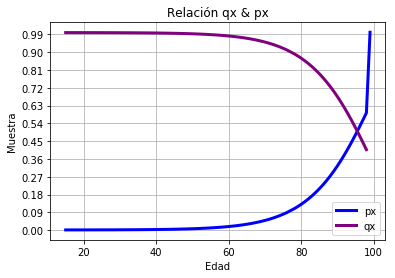

In [205]:
Victor.gráficas("qx")

In [207]:
Victor.renglón(30)

,Edad,lx,dx,px,qx,Dx,Nx,Cx,Mx
30,30,"9,705,398","23,244",0.002395,0.997605,"$2,591,341.40","$48,499,416.90","$5,938.90","$502,850.30"
